In [3]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import numpy as np 
from plot_decision_regions import plot_decision_regions
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:',np.unique(y))

Class labels: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1, stratify=y)
print('Labels count in y:', np.bincount(y))

Labels count in y: [50 50 50]


[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 ... -0.86 -0.86 -0.86]
 ...
 [ 3.44  3.44  3.44 ...  3.44  3.44  3.44]
 [ 3.46  3.46  3.46 ...  3.46  3.46  3.46]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]]
(220, 395)


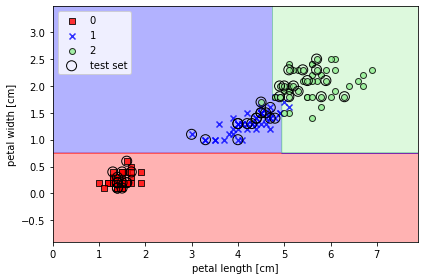

In [25]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

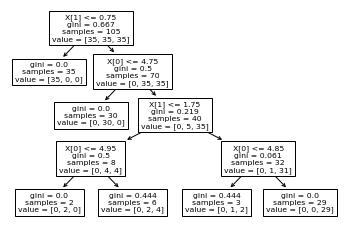

In [10]:
from sklearn import tree 
tree.plot_tree(tree_model)
plt.show()

In [23]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],feature_names=['petal length','petal width'],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found